In [129]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [130]:
data = pd.read_csv("/home/yuliya/Downloads/Training_wells.csv")

<AxesSubplot:>

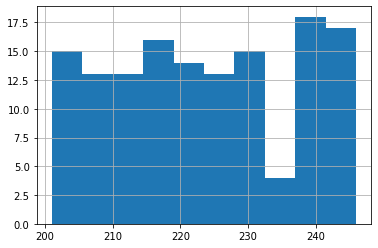

In [116]:
data.X.hist()

In [117]:
# test_data = pd.read_csv("/home/yuliya/Downloads/Empty_part.csv")

<AxesSubplot:>

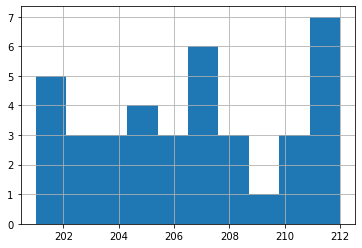

In [131]:
test_data.head()
test_data.X.hist()

<AxesSubplot:>

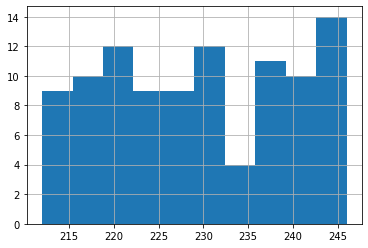

In [120]:
train_data.X.hist()

In [133]:
data = data.drop('Well', axis=1)
data.head()

,X,Y,NTG
0,201,907,0.2006
1,201,914,0.3624
2,201,924,0.4381
3,202,922,0.4289
4,202,925,0.4021


In [135]:
razn = []
for i in range(0, 138):
    x = data.loc[i].X
    y = data.loc[i].Y
    razn.append(y - x)

In [136]:
data['Razn'] = razn

In [137]:
data.shape

(138, 4)

In [138]:
data.head()

,X,Y,NTG,Razn
0,201,907,0.2006,706.0
1,201,914,0.3624,713.0
2,201,924,0.4381,723.0
3,202,922,0.4289,720.0
4,202,925,0.4021,723.0


In [139]:
test_data = data[0:38]
train_data = data[38:]
test_Y = test_data['NTG']
test_data = test_data.drop(['NTG'], axis=1)

In [140]:
test_data.head()

,X,Y,Razn
0,201,907,706.0
1,201,914,713.0
2,201,924,723.0
3,202,922,720.0
4,202,925,723.0


In [141]:
test_data.isnull().sum()

X       0
Y       0
Razn    0
dtype: int64

In [142]:
y = train_data['NTG']
X = train_data.drop(['NTG'], axis=1)

In [143]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [144]:
predicted = forest_model.predict(test_data)

In [145]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [147]:
mean_squared_error(test_Y, predicted)

0.006214466661210532

In [148]:
test_Y.head(10)

0    0.2006
1    0.3624
2    0.4381
3    0.4289
4    0.4021
5    0.2628
6    0.2517
7    0.3452
8    0.2092
9    0.1974
Name: NTG, dtype: float64

In [149]:
predicted

array([0.315069, 0.357696, 0.304336, 0.317228, 0.315591, 0.367305,
       0.386262, 0.319473, 0.388199, 0.318802, 0.315591, 0.336559,
       0.350397, 0.308815, 0.315528, 0.354848, 0.351306, 0.319473,
       0.31555 , 0.318342, 0.355722, 0.354493, 0.315528, 0.316899,
       0.354273, 0.35466 , 0.315591, 0.345177, 0.359124, 0.344709,
       0.317301, 0.359315, 0.349223, 0.313416, 0.315528, 0.318061,
       0.388199, 0.389179])

In [150]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [151]:
model = LinearRegression()

In [152]:
model.fit(X, y)

LinearRegression()

In [153]:
predicted = model.predict(test_data)
mean_squared_error(test_Y, predicted)

0.006664836298575097